# College Event Feedback Analysis

# Dataset Overview

In [ ]:
import pandas as pd
df = pd.read_csv(r"/student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

## Data Cleaning & Preparation

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
df.set_index('Unnamed: 0',inplace=True)
df.index.name = "Serial_No"
df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
Serial_No,,,,,,,,,
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


## Rating-Based Feedback Analysis

In [ ]:
rating_cols = df.columns.drop('Student ID')
rating_cols

Index(['Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [ ]:
avg_scores = df[rating_cols].mean().sort_values(ascending=False)
avg_scores

,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


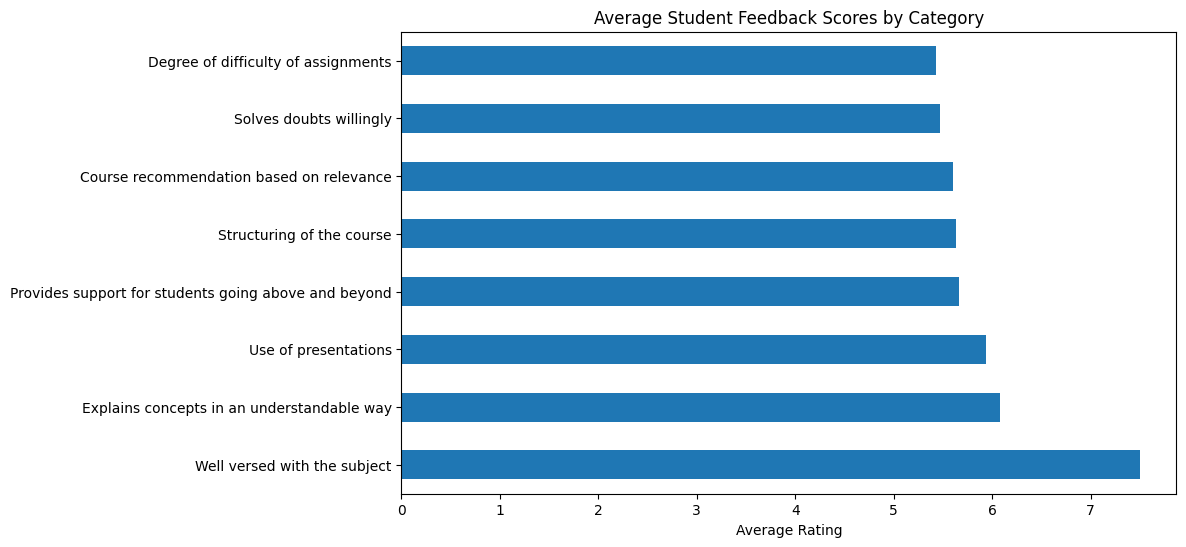

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
avg_scores.plot(kind='barh')
plt.title('Average Student Feedback Scores by Category')
plt.xlabel('Average Rating')
plt.show()

The highest average scores were observed for subject knowledge and course relevance, while assignment difficulty and course structure showed comparatively lower ratings.

## Overall Satisfaction Score

In [ ]:
df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)
df[['Overall_Satisfaction']].head()

,Overall_Satisfaction
Serial_No,
0,5.000
1,4.875
2,4.375
3,5.875
4,7.500


In [ ]:
df['Overall_Satisfaction'].describe()

,Overall_Satisfaction
count,1001.000000
mean,5.915460
std,0.894734
min,3.375000
25%,5.250000
50%,5.875000
75%,6.625000
max,8.250000


## Satisfaction Level Distribution

In [31]:
def satisfaction_label(score):
    if score >= 8:
        return 'Highly Satisfied'
    elif score >= 6:
        return 'Satisfied'
    else:
        return 'Needs Improvement'

df['Satisfaction_Level'] = df['Overall_Satisfaction'].apply(satisfaction_label)
df[['Overall_Satisfaction', 'Satisfaction_Level']].head()

,Overall_Satisfaction,Satisfaction_Level
Serial_No,,
0,5.000,Needs Improvement
1,4.875,Needs Improvement
2,4.375,Needs Improvement
3,5.875,Needs Improvement
4,7.500,Satisfied


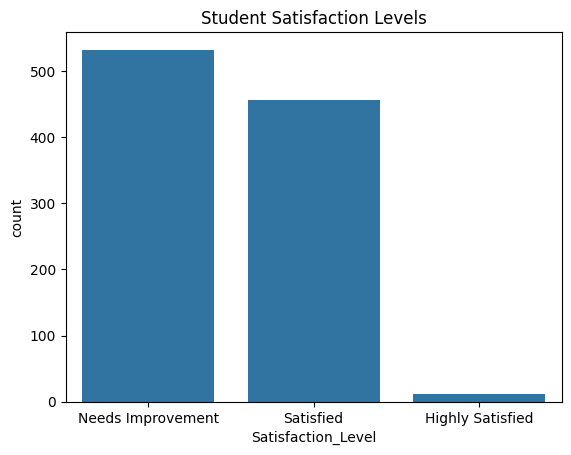

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Satisfaction_Level', data=df)
plt.title('Student Satisfaction Levels')
plt.show()

The satisfaction level distribution shows that most students fall under the “Satisfied” and “Needs Improvement” categories, while only a small number of responses indicate very high satisfaction. This suggests that although students are generally content, there is scope for enhancing course delivery and engagement.

## NLP-Based Sentiment Analysis

In [ ]:
def generate_feedback(score):
    if score >= 8:
        return "Excellent course, very engaging and informative"
    elif score >= 6:
        return "Good course but some areas can be improved"
    else:
        return "Course structure needs improvement"

df['Feedback_Text'] = df['Overall_Satisfaction'].apply(generate_feedback)
df[['Overall_Satisfaction', 'Feedback_Text']].head()

,Overall_Satisfaction,Feedback_Text
Serial_No,,
0,5.000,Course structure needs improvement
1,4.875,Course structure needs improvement
2,4.375,Course structure needs improvement
3,5.875,Course structure needs improvement
4,7.500,Good course but some areas can be improved



The original dataset did not contain textual feedback. For demonstrating NLP techniques, a feedback text column was programmatically generated based on satisfaction scores.

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['NLP_Sentiment'] = df['Feedback_Text'].apply(get_sentiment)
df[['Feedback_Text', 'NLP_Sentiment']].head()

,Feedback_Text,NLP_Sentiment
Serial_No,,
0,Course structure needs improvement,Neutral
1,Course structure needs improvement,Neutral
2,Course structure needs improvement,Neutral
3,Course structure needs improvement,Neutral
4,Good course but some areas can be improved,Positive


### NLP Sentiment Distribution

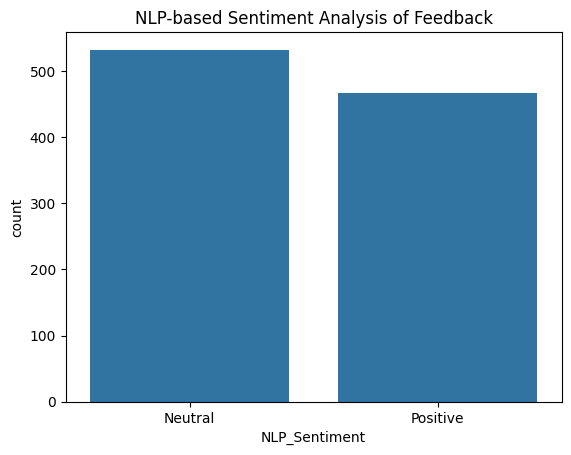

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='NLP_Sentiment', data=df)
plt.title('NLP-based Sentiment Analysis of Feedback')
plt.show()

The NLP-based sentiment analysis shows that most feedback falls into the Neutral and Positive categories, indicating generally favorable but moderate student satisfaction. The lack of negative sentiment suggests no major issues, while the dominance of neutral feedback highlights opportunities to improve course structure, engagement, and delivery.

### Word Cloud Analysis

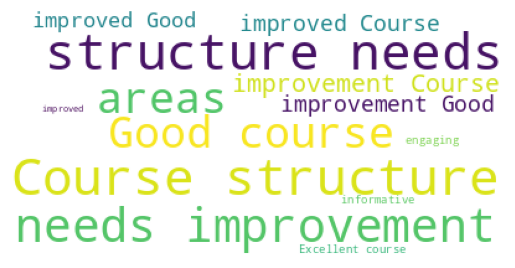

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['Feedback_Text'])

wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

Key Insights

Rating-based analysis shows that most students fall into the Satisfied category, with a smaller proportion being Highly Satisfied, indicating generally positive feedback with room for improvement.

Course-related aspects such as subject understanding and relevance received relatively higher average ratings.

Course structure and assignment difficulty received comparatively lower satisfaction scores, highlighting key areas for enhancement.

NLP-based sentiment analysis reveals a predominance of Neutral and Positive sentiment, suggesting that students have a generally favorable but moderate emotional response to the course.

The absence of strong Negative sentiment indicates no major dissatisfaction, while neutral sentiment points toward opportunities to further improve engagement and delivery.

Recommendation
Improve course structuring and pacing to enhance overall student understanding and engagement.

Introduce more interactive teaching methods and effective use of presentations to increase student participation.

Provide additional academic support and guidance for students facing difficulty with assignments.

Collect open-ended feedback in future surveys to gain deeper qualitative insights into student concerns and expectations.